# Reconstruction Analysis
It is now important to understand how well our reconstruction worked. Finding a clear metric allow us to fine tune number of scans required as well the necessity of new steps that coudld improve robustness and accuracy.

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import binary_fill_holes

from src.io_utils import load_stl_as_array
from src.constants import gb_cmap
from src.physics_utils import center_volume, volume_reshape

example_camera = 0
plt.style.use('dark_background')

## 1. Volume Import
To do any type of analysis is important we have the original and reconstructed volume imported with the same resolution as an array. 

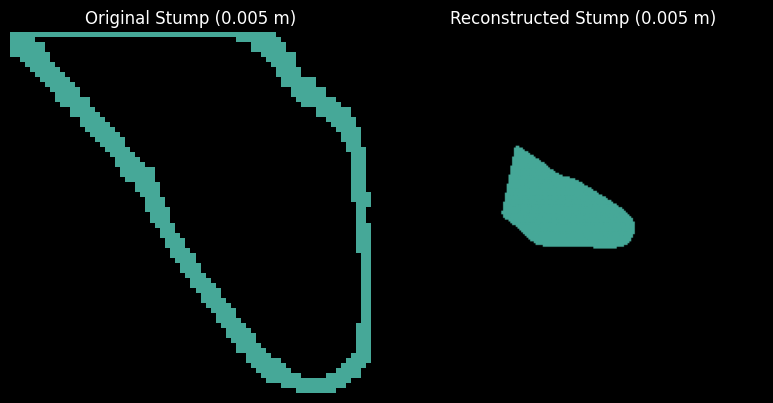

Original Stump Shape: (72, 72, 72), Reconstructed Stump Shape: (200, 200, 200)


In [2]:
original_stump, voxel_size = load_stl_as_array("../blender_simulator/objects/stump.stl", 0.0025)
reconstructed_stump = pickle.load(open("reconstruction_mesh/30d_convex_hull_voxel0.005.pkl", "rb"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Whater-tight the original stump
original_stump[:, 0, :] = binary_fill_holes(original_stump[:, 0, :]).astype(np.uint8)

ax1.imshow(original_stump[original_stump.shape[0]//2, :, :], cmap=gb_cmap)
ax1.set_title(f'Original Stump ({voxel_size:.1} m)')
ax1.axis('off')

ax2.imshow(reconstructed_stump[100, :, :], cmap=gb_cmap)
ax2.set_title('Reconstructed Stump (0.005 m)')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"Original Stump Shape: {original_stump.shape}, Reconstructed Stump Shape: {reconstructed_stump.shape}")

Clearly we have some issues we need to make sure are fixed before we can do any comparisons. These include:
- Make sure that both have the **same voxel size**
- Make sure both are **filled** (whater-tight)
- Maker sure both are aligned

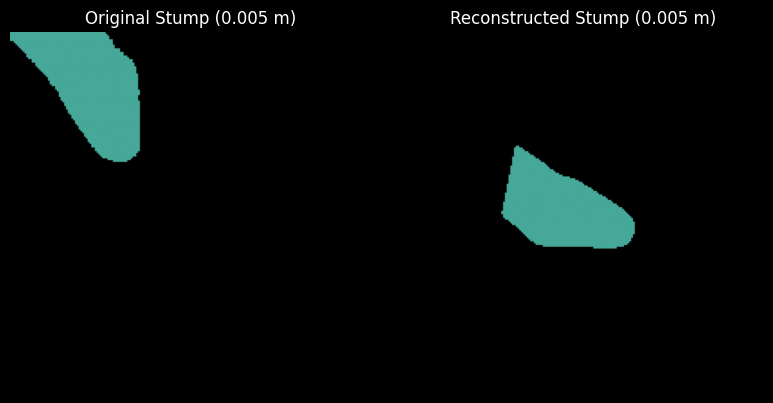

In [3]:
# RESHAPE
reshaped_original_stump = volume_reshape(original_stump, reconstructed_stump)

# FILLING
reshaped_original_stump = binary_fill_holes(reshaped_original_stump).astype(np.uint8)

# VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.imshow(reshaped_original_stump[original_stump.shape[0]//2, :, :], cmap=gb_cmap)
ax1.set_title(f'Original Stump ({voxel_size:.1} m)')
ax1.axis('off')

ax2.imshow(reconstructed_stump[reconstructed_stump.shape[0]//2, :, :], cmap=gb_cmap)
ax2.set_title('Reconstructed Stump (0.005 m)')
ax2.axis('off')

plt.tight_layout()
plt.show()

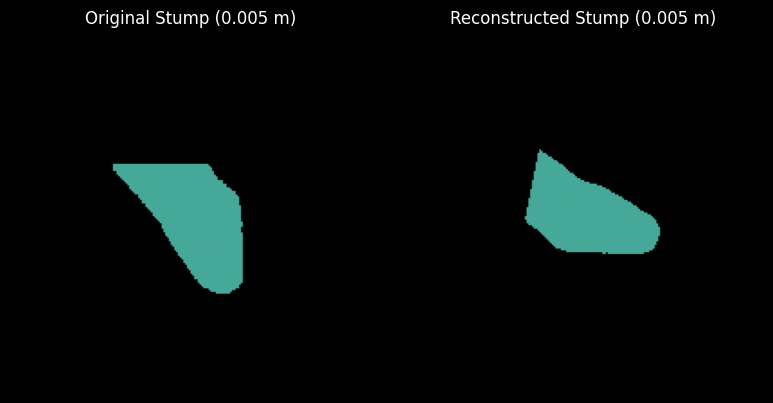

In [4]:
original_centered = center_volume(reshaped_original_stump)
reconstructed_centered = center_volume(reconstructed_stump)

# VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.imshow(original_centered[original_centered.shape[0]//2, :, :], cmap=gb_cmap)
ax1.set_title(f'Original Stump ({voxel_size:.1} m)')
ax1.axis('off')

ax2.imshow(reconstructed_centered[reconstructed_centered.shape[0]//2, :, :], cmap=gb_cmap)
ax2.set_title('Reconstructed Stump (0.005 m)')
ax2.axis('off')

plt.tight_layout()
plt.show()